In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
music = pd.DataFrame()

music["duration"] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music["jazz"] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]



In [3]:
music.head()

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


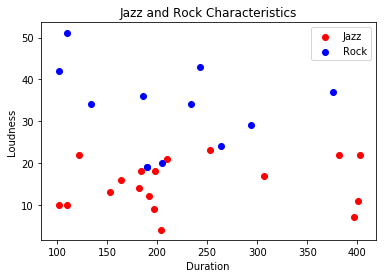

In [14]:
plt.scatter(music[music["jazz"] == 1].duration,
           music[music["jazz"] == 1].loudness,
           color="red")
plt.scatter(music[music["jazz"] == 0].duration,
           music[music["jazz"] == 0].loudness, color="blue")
plt.legend(["Jazz", "Rock"])
plt.title("Jazz and Rock Characteristics")
plt.xlabel("Duration")
plt.ylabel("Loudness")
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[["loudness", "duration"]]
Y = music.jazz
neighbors.fit(X,Y)

neighbors.predict([[24, 190]])

array([0], dtype=int64)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[["loudness", "duration"]]
Y = music.jazz
neighbors.fit(X,Y)

print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24,190]]))

[1]
[[0.4 0.6]]


(101.5, 401.5)

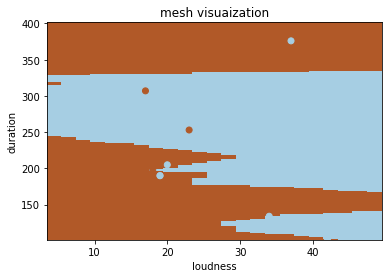

In [25]:
X = np.array(X)
Y = np.array(Y)

h = 2.0

x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6,4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:,0], X[:,1], c = Y)
plt.xlabel("loudness")
plt.ylabel("duration")
plt.title("mesh visuaization")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())